# Capstone Project IBM Data Science Week 4

## Analysing the Location Factors in the City of Vienna for Opening a Restaurant

### Table of Contents
 - Introduction
 - Business Problem Statement
 - Data used for the Study
 - Methods Applied
 - Analysis
 - Results and Discussion
 - Conclusion

### Introduction

The city of Vienna is perennially ranking as one of the cities with the highest quality of life.  Official statistics show the growth of the city in ternms of population and tourism.  This is reflected in the two charts shown below on population growth and city visitor numbers. 

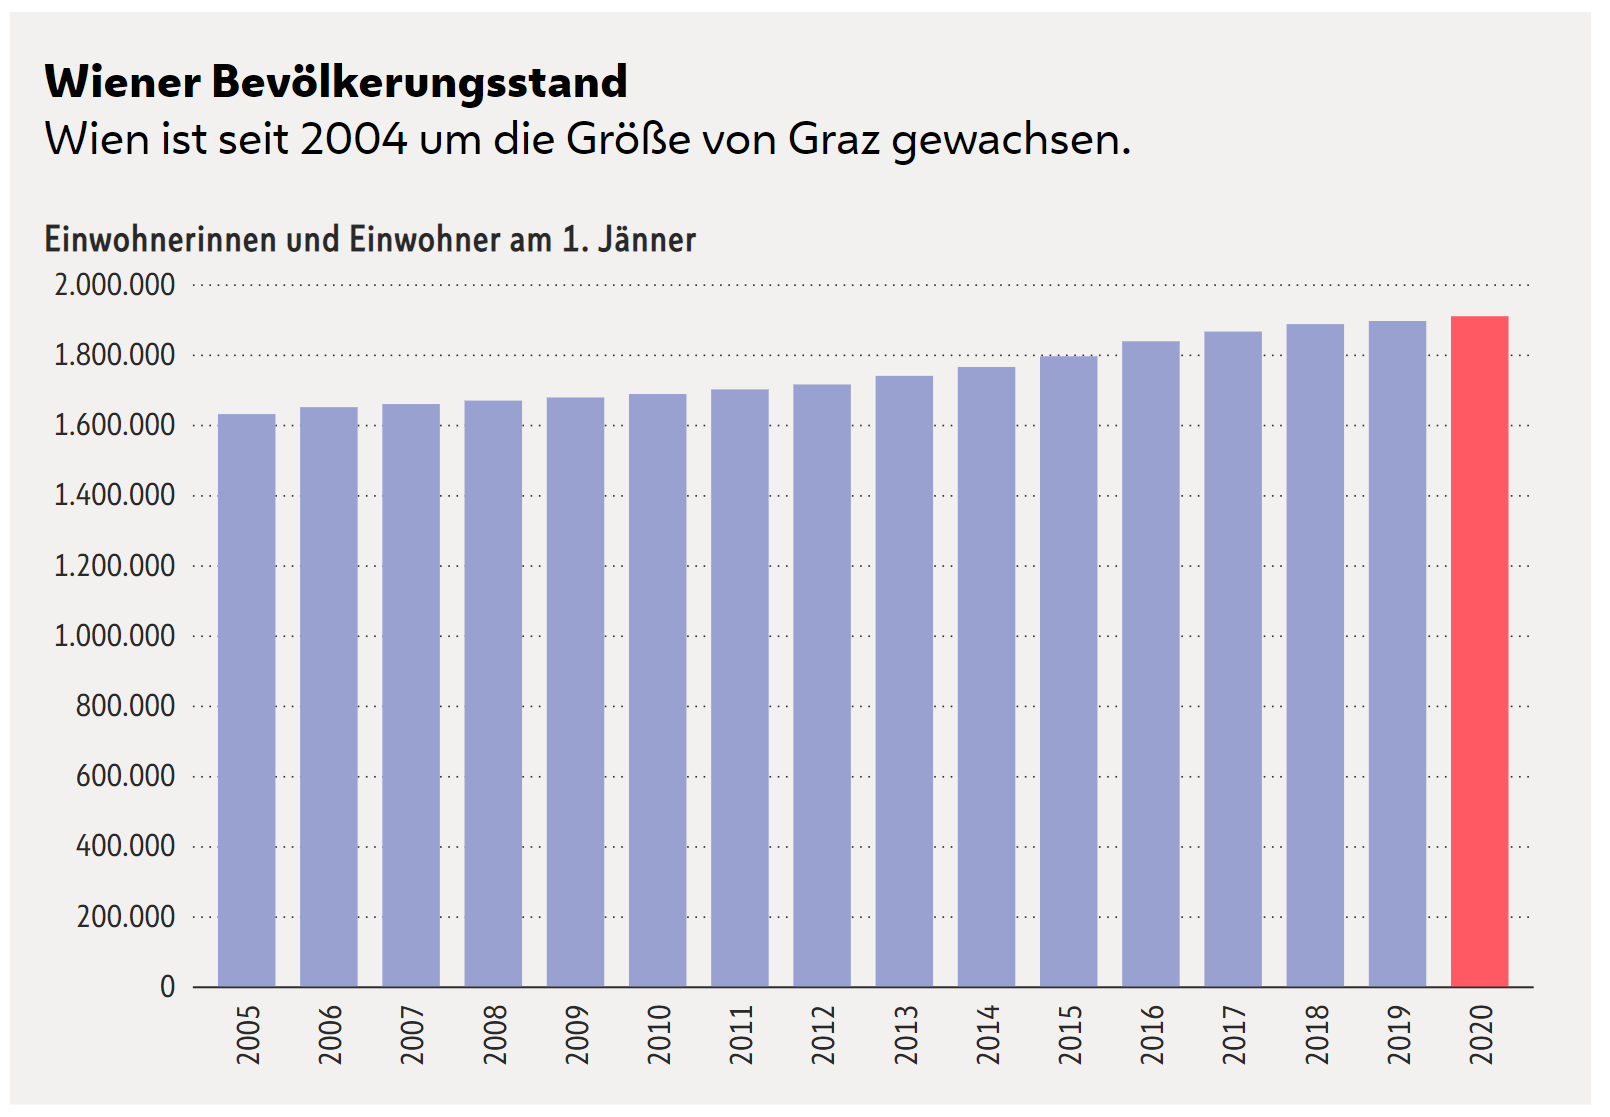
Figure 1: Official population growth statistics of the city of Vienna (source: https://www.wien.gv.at/statistik/bevoelkerung/bevoelkerungsstand/)

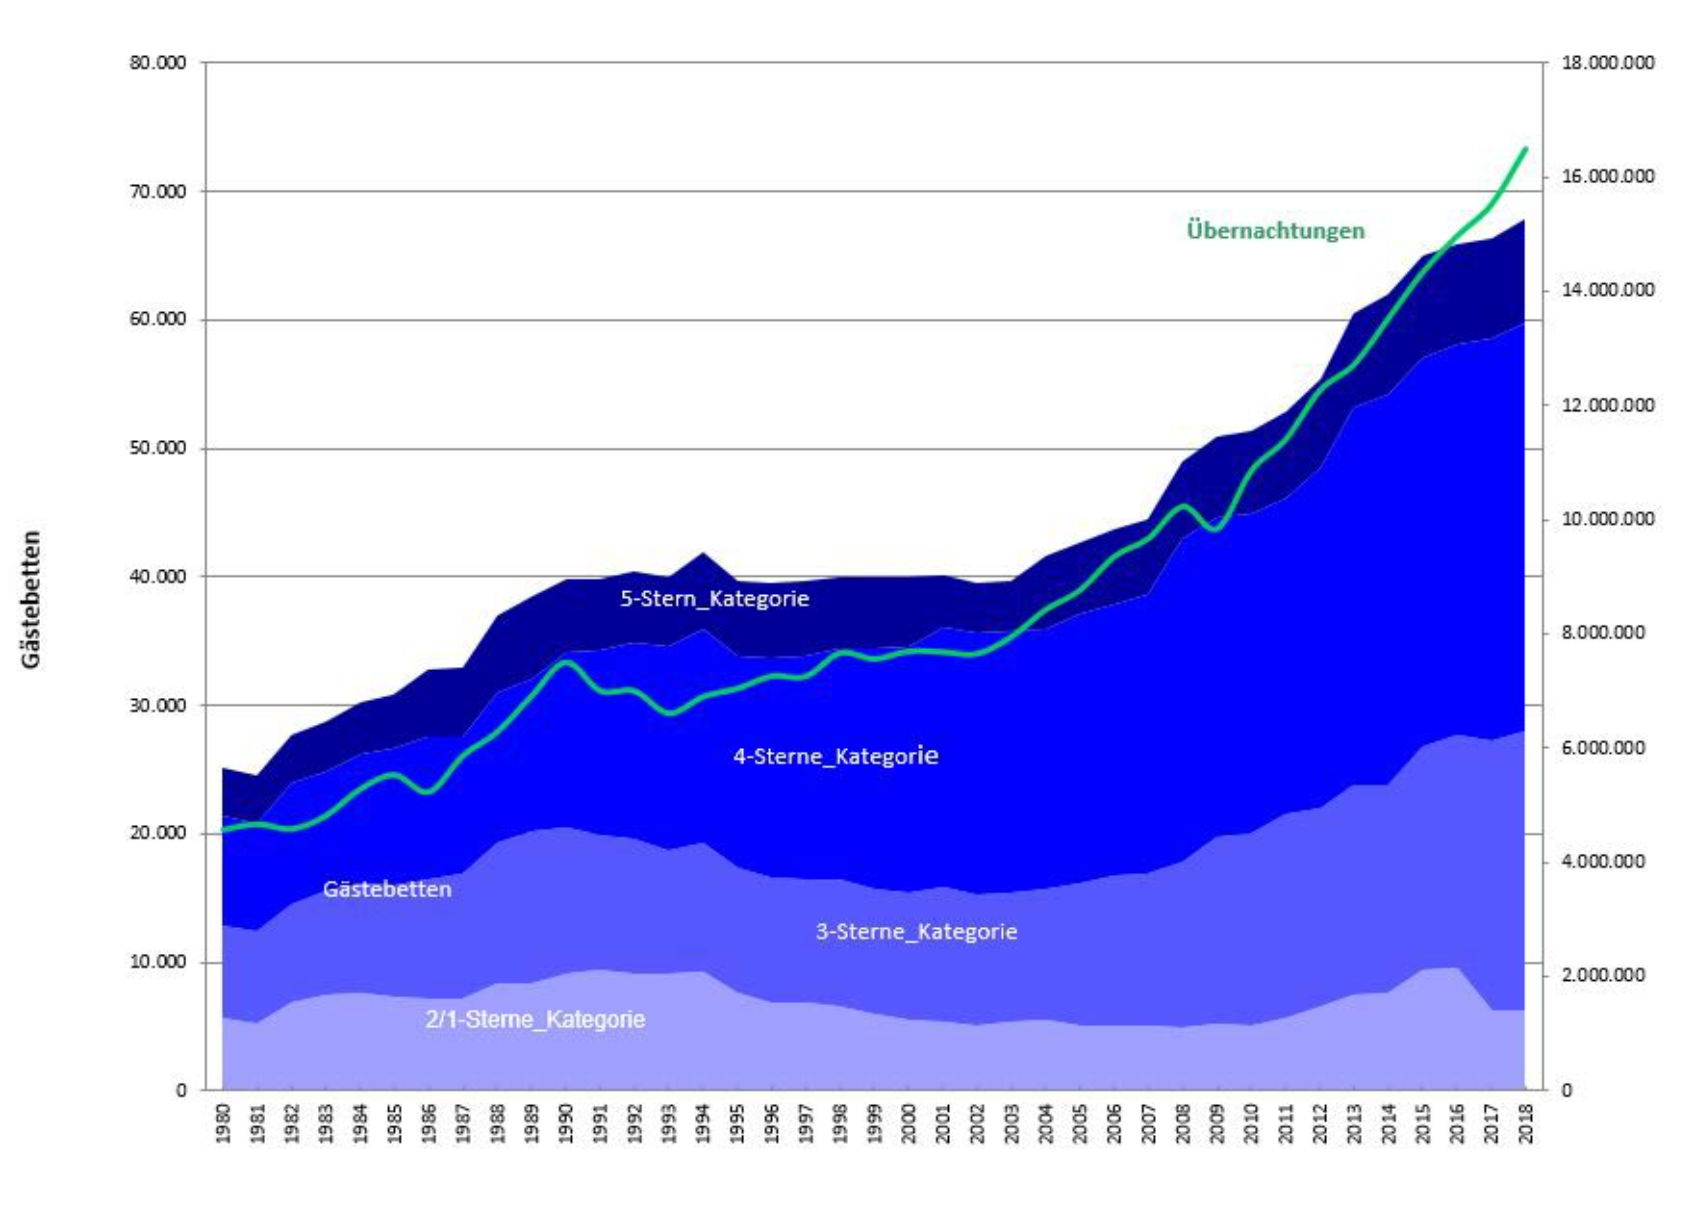
Figure 1: Official number of overnight stays between 1980 and 2018 from the city of Vienna (source: https://www.wien.gv.at/statistik/wirtschaft/tourismus/)

On the premise of growth it is enticing to consider an investment into something like a restaurant to harvest some of the growth in population and visitors through a restaurant.  Especially, since a city with one of the highest quality of life ratings  indicates also that people do like to go out and enjoy music, theatre, food, drink and other spectacles.  One would consider that placing the restaurant in the historic city center may be a foregone conclusion, due to the high number of tourists, but it would be best to analyse the data and find the perfect niche.  What needs to be considered is the rental cost in the area, which is in the tourist hot spots the highest.  This analysis will look where a restaurantrant can be placed conveniently to ensure a large catchment area which also boasts a large disposable total income of the district or area. 

### Business Problem


The following questions the analysis is trying to answer:
- Is the city center the best location for placing the restaurant?
- What are alternative locations for placing a restaurant?
- How are alternative locations placed in relation to tourist attractions?
- Given the current landscape of restaurants, what type of restaurant should be opened?

### Data used for the Study
The following data was used for the study:
- List of districts of Vienna (source: https://de.wikipedia.org/wiki/Wiener_Gemeindebezirke)
- Income of people inside the districts (source: https://www.wien.gv.at/statistik/arbeitsmarkt/tabellen/einkommen-gesamt-bez.html)
- Number of overnbight stays by visitors in Vienna (source: https://www.wien.gv.at/statistik/wirtschaft/tabellen/uebern-bezirk-zr.html)
- Foursquare data through the Foursquare developer API (see: https://de.foursquare.com/developers/apps)
- Geolocation data through the geopy library (see: https://geopy.readthedocs.io/en/stable/)

The data consists of several tables, which have been scraped from the websites and loaded into a pandas dataframe.  One needs to be aware that the data uses 'comma' as the decimal separator and therefore the data needed some adjustments in order to make it comply with the pandas data frame, where the decimal separator is the 'full stop'.

Below the loading of the data is shown to give the reader an idea of the data used.

In [1]:
# loading first some python libraries in order to work with the data

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\dkuna\Capstone>set "JAVA_HOME="  

C:\Users\dkuna\Capstone>set "JAVA_HOME_CONDA_BACKUP="  

C:\Users\dkuna\Capstone>set "JAVA_HOME=C:\Users\dkuna\AppData\Local\Continuum\anaconda3\Library"  
Solving environment: ...working... done

# All requested packages already installed.


C:\Users\dkuna\Capstone>set "JAVA_HOME="  

C:\Users\dkuna\Capstone>set "JAVA_HOME_CONDA_BACKUP="  

C:\Users\dkuna\Capstone>set "JAVA_HOME=C:\Users\dkuna\AppData\Local\Continuum\anaconda3\Library"  
Libraries imported.


##### A) Loading District Data

In [2]:
# loading now the list districts from the first source given
wien = pd.read_html('https://de.wikipedia.org/wiki/Wiener_Gemeindebezirke')
print(len(wien))

2


It can be seen that two tables have been loaded and the required table needed is the fiorst one from the page.  Therefore the first table will be loaded into the data frame.

In [3]:
wien[0]

,0,1,2,3,4,5,6,7,8
0,Nr.,Gemeinde­bezirk,Wappen,Bezirksteile,Eingemeindung,Flächein ha[11],Ein­wohner(2020)[12],Ein­wohnerje km²,Beschäf­tigte(2016)[13]
1,01,Innere Stadt,NaN,—,1850: Bezirksfläche außerhalb der Stadtmauer,2869,16.047,NaN,108.679
2,02,Leopoldstadt,NaN,Jägerzeile Leopoldstadt Zwischenbrücken,"1850 inkl. Brigittenau, seit 1900 20. Bezirk m...",1.9242,105.848,NaN,66.945
3,03,Landstraße,NaN,Landstraße Erdberg Weißgerberviertel,1850; seit 1938 mit Arsenal und Schweizergarte...,7398,91.680,NaN,101.100
4,04,Wieden,NaN,Hungelbrunn Schaumburgergrund Wieden,"1850 (bis 1861 inkl. Margareten, bis 1874 inkl...",1775,33.212,NaN,28.439
5,05,Margareten,NaN,Hundsturm Laurenzergrund Margareten Matzleinsd...,"1850 als Teil Wiedens, 1861 Bezirk (bis 1874 i...",2012,55.123,NaN,20.567
6,06,Mariahilf,NaN,Gumpendorf Laimgrube Magdalenengrund Mariahilf...,1850 (bis 1861 als 5. Bezirk geführt),1455,31.651,NaN,28.676
7,07,Neubau,NaN,Altlerchenfeld Neubau Sankt Ulrich Schottenfel...,1850 (bis 1861 als 6. Bezirk geführt),1608,31.961,NaN,33.592
8,08,Josefstadt,NaN,Alservorstadt Altlerchenfeld Breitenfeld Josef...,1850 (bis 1861 als 7. Bezirk geführt); seit 18...,1090,25.021,NaN,15.762
9,09,Alsergrund,NaN,Alservorstadt Althangrund Himmelpfortgrund Lic...,1850 (bis 1861 als 8. Bezirk geführt); bis 186...,2967,41.884,NaN,49.847


One can see that the table about the districts is very descriptive and has lines, which I do not necessarily need. Further, looking at the numbers and comparing them to the actual table one can see, that in Europe the decimal point is the comma (,) and in any English speaking country it is the fullstop (.). Because of the decimal point difference, the data has been loaded not correctly and needs to be adjusted. One can also see, that the column 7 is not showing any values although in reality here we can see on wikipedia the density of inhabitants per km2 in each district. This would need to be calculated. There are columns in the table, which are not needed like column 2 and 4. Also rows 24 and 25 are a tabular summary that can be removed. Also, the row 0 should be the column heading rather than a table entry. This means a lot of wrangling needs to be done.

In [4]:
#converting table into a data frame
df = wien[0]
df.head()

,0,1,2,3,4,5,6,7,8
0,Nr.,Gemeinde­bezirk,Wappen,Bezirksteile,Eingemeindung,Flächein ha[11],Ein­wohner(2020)[12],Ein­wohnerje km²,Beschäf­tigte(2016)[13]
1,01,Innere Stadt,NaN,—,1850: Bezirksfläche außerhalb der Stadtmauer,2869,16.047,NaN,108.679
2,02,Leopoldstadt,NaN,Jägerzeile Leopoldstadt Zwischenbrücken,"1850 inkl. Brigittenau, seit 1900 20. Bezirk m...",1.9242,105.848,NaN,66.945
3,03,Landstraße,NaN,Landstraße Erdberg Weißgerberviertel,1850; seit 1938 mit Arsenal und Schweizergarte...,7398,91.680,NaN,101.100
4,04,Wieden,NaN,Hungelbrunn Schaumburgergrund Wieden,"1850 (bis 1861 inkl. Margareten, bis 1874 inkl...",1775,33.212,NaN,28.439


In [5]:
#removing now unecessary columns and rows
df.drop([24, 25], inplace=True)
df.drop(columns=[2, 3, 4, 7], inplace=True)
df.head()

,0,1,5,6,8
0,Nr.,Gemeinde­bezirk,Flächein ha[11],Ein­wohner(2020)[12],Beschäf­tigte(2016)[13]
1,01,Innere Stadt,2869,16.047,108.679
2,02,Leopoldstadt,1.9242,105.848,66.945
3,03,Landstraße,7398,91.680,101.100
4,04,Wieden,1775,33.212,28.439


In [6]:
# remaing the columns  and giving them english names and remove row 0
df.columns=['Distric#', 'District', 'Area', 'Inhabitants', 'Emp_District']
df.drop([0], inplace=True)
df.head()

,Distric#,District,Area,Inhabitants,Emp_District
1,01,Innere Stadt,2869,16.047,108.679
2,02,Leopoldstadt,1.9242,105.848,66.945
3,03,Landstraße,7398,91.680,101.100
4,04,Wieden,1775,33.212,28.439
5,05,Margareten,2012,55.123,20.567


In [21]:
df.columns=['District_#', 'District', 'Area', 'Inhabitants', 'Emp_District']
df.head()

,District_#,District,Area,Inhabitants,Emp_District
1,01,Innere Stadt,2869,16.047,108.679
2,02,Leopoldstadt,1.9242,105.848,66.945
3,03,Landstraße,7398,91.680,101.100
4,04,Wieden,1775,33.212,28.439
5,05,Margareten,2012,55.123,20.567


In [7]:
# the decimal point needs to be changed and the neighbourhoods are not separated by commas.  
# This is done in excel and therefore the dataframe is now exported to csv format.
df.to_csv('v0a.csv')

In [8]:
# now loading the file which was edited in excel as discussed above
v1 = pd.read_csv('v0.csv')
v1.head()

,Distric_#,District,Neighbourhoods,Area,Inhabitants,Emp_District
0,1,Innere Stadt,Innere Stadt,286.9,16047,108679
1,2,Leopoldstadt,"Jägerzeile, Leopoldstadt, Zwischenbrücken",1924.2,105848,66945
2,3,Landstraße,"Landstraße, Erdberg, Weißgerberviertel",739.8,91680,101100
3,4,Wieden,"Hungelbrunn, Schaumburgergrund, Wieden",177.5,33212,28439
4,5,Margareten,"Hundsturm, Laurenzergrund, Margareten, Matzlei...",201.2,55123,20567


In [9]:
# we now add back in the population density per district, which can be later used for analysis
v1['Inhab_Density'] = v1['Inhabitants']/v1['Area']*100
v1.head()

,Distric_#,District,Neighbourhoods,Area,Inhabitants,Emp_District,Inhab_Density
0,1,Innere Stadt,Innere Stadt,286.9,16047,108679,5593.238062
1,2,Leopoldstadt,"Jägerzeile, Leopoldstadt, Zwischenbrücken",1924.2,105848,66945,5500.883484
2,3,Landstraße,"Landstraße, Erdberg, Weißgerberviertel",739.8,91680,101100,12392.538524
3,4,Wieden,"Hungelbrunn, Schaumburgergrund, Wieden",177.5,33212,28439,18710.985915
4,5,Margareten,"Hundsturm, Laurenzergrund, Margareten, Matzlei...",201.2,55123,20567,27397.117296


##### B) Loading Income Data

In [10]:
# loading the data from the web page
inc = pd.read_html('https://www.wien.gv.at/statistik/arbeitsmarkt/tabellen/einkommen-gesamt-bez.html')
inc[0]

,0,1,2,3,4
0,Gemeindebezirk,Durchschnittlicher Jahresbezug pro Arbeitnehme...,Durchschnittlicher Jahresbezug pro Pensionisti...,NaN,NaN
1,brutto,netto,brutto,netto,NaN
2,Wien,33 211,22 943,26 485,21 339
3,1. Innere Stadt,40 817,26 480,33 369,25 478
4,2. Leopoldstadt,33 189,22 904,24 261,19 832
5,3. Landstraße,35 649,24 172,26 912,21 524
6,4. Wieden,38 873,25 878,30 575,24 029
7,5. Margareten,29 306,20 479,23 435,19 284
8,6. Mariahilf,35 405,23 971,26 785,21 547
9,7. Neubau,37 403,25 100,27 871,22 209


Viewing the loaded data with the actual data shows that some of the column headings are jumbled up and therefore needs some tidying up.

In [11]:
# convert data to data frame
inc1 = inc[0]
inc1.head()

,0,1,2,3,4
0,Gemeindebezirk,Durchschnittlicher Jahresbezug pro Arbeitnehme...,Durchschnittlicher Jahresbezug pro Pensionisti...,NaN,NaN
1,brutto,netto,brutto,netto,NaN
2,Wien,33 211,22 943,26 485,21 339
3,1. Innere Stadt,40 817,26 480,33 369,25 478
4,2. Leopoldstadt,33 189,22 904,24 261,19 832


In [12]:
# now tidying up the table by removing rows and columns not needed and renaming columns which make sense
inc1.drop(columns=[1, 3, 4], inplace=True)
inc1.drop([0, 1, 2], inplace=True)
inc1.head()

,0,2
3,1. Innere Stadt,26 480
4,2. Leopoldstadt,22 904
5,3. Landstraße,24 172
6,4. Wieden,25 878
7,5. Margareten,20 479


In [13]:
# add new column labels
inc1.columns=['District', 'Avg_Net_Inc']
inc1.head()

,District,Avg_Net_Inc
3,1. Innere Stadt,26 480
4,2. Leopoldstadt,22 904
5,3. Landstraße,24 172
6,4. Wieden,25 878
7,5. Margareten,20 479


In [18]:
# In order to merge with the previous table need to add common igentifier, which will be the district number
inc1.insert(0, "District_#", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
inc1.head()

,District_#,District,Avg_Net_Inc
3,1,1. Innere Stadt,26 480
4,2,2. Leopoldstadt,22 904
5,3,3. Landstraße,24 172
6,4,4. Wieden,25 878
7,5,5. Margareten,20 479


In [24]:
# now merging both into the final data frame:
vie = pd.merge(left=v1, right=inc1, how='left', left_on='District_#', right_on='District_#')
vie

,District_#,District_x,Neighbourhood,Area,Inhabitants,Emp_District,Inhab_Density,District_y,Avg_Net_Inc
0,1,Innere Stadt,Innere Stadt,286.9,16047,108679,5593.238062,1. Innere Stadt,26 480
1,2,Leopoldstadt,"Jägerzeile, Leopoldstadt, Zwischenbrücken",1924.2,105848,66945,5500.883484,2. Leopoldstadt,22 904
2,3,Landstraße,"Landstraße, Erdberg, Weißgerberviertel",739.8,91680,101100,12392.538524,3. Landstraße,24 172
3,4,Wieden,"Hungelbrunn, Schaumburgergrund, Wieden",177.5,33212,28439,18710.985915,4. Wieden,25 878
4,5,Margareten,"Hundsturm, Laurenzergrund, Margareten, Matzlei...",201.2,55123,20567,27397.117296,5. Margareten,20 479
5,6,Mariahilf,"Gumpendorf, Laimgrube, Magdalenengrund, Mariah...",145.5,31651,28676,21753.264605,6. Mariahilf,23 971
6,7,Neubau,"Altlerchenfeld, Neubau, Sankt Ulrich, Schotten...",160.8,31961,33592,19876.243781,7. Neubau,25 100
7,8,Josefstadt,"Alservorstadt, Altlerchenfeld, Breitenfeld, Jo...",109.0,25021,15762,22955.045872,8. Josefstadt,25 142
8,9,Alsergrund,"Alservorstadt, Althangrund, Himmelpfortgrund, ...",296.7,41884,49847,14116.616111,9. Alsergrund,24 701
9,10,Favoriten,"Favoriten, Inzersdorf-Stadt, Oberlaa, Rothneus...",3182.8,207193,76051,6509.771271,10. Favoriten,19 478


In [25]:
# the table has the district names twice in it and the latter instance will be dropped
vie.drop(columns=['District_y'], inplace=True)
vie.head()

,District_#,District_x,Neighbourhood,Area,Inhabitants,Emp_District,Inhab_Density,Avg_Net_Inc
0,1,Innere Stadt,Innere Stadt,286.9,16047,108679,5593.238062,26 480
1,2,Leopoldstadt,"Jägerzeile, Leopoldstadt, Zwischenbrücken",1924.2,105848,66945,5500.883484,22 904
2,3,Landstraße,"Landstraße, Erdberg, Weißgerberviertel",739.8,91680,101100,12392.538524,24 172
3,4,Wieden,"Hungelbrunn, Schaumburgergrund, Wieden",177.5,33212,28439,18710.985915,25 878
4,5,Margareten,"Hundsturm, Laurenzergrund, Margareten, Matzlei...",201.2,55123,20567,27397.117296,20 479


##### C) Loading Visitor Data and Merge with DF

In [26]:
# loading the data from the website
# loading the data from the web page
file = pd.read_html('https://www.wien.gv.at/statistik/wirtschaft/tabellen/uebern-bezirk-zr.html')
file[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Bezirk,Berichtsjahr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
2,Wien,9 675 208,10 226 581,9 842 827,10 860 126,11 405 048,12 262 828,12 719 289,13 524 266,14 328 261,14 962 438,15 512 730,16 483 497,17 604 573
3,1. Innere Stadt,1 886 813,1 824 962,1 774 470,1 978 827,2 047 280,2 137 689,2 193 825,2 201 172,2 467 265,2 566 709,2 762 168,2 976 413,3 119 868
4,2. Leopoldstadt,933 578,1 025 951,1 016 966,1 150 389,1 302 447,1 491 456,1 511 506,1 689 960,1 774 685,1 836 293,1 873 493,1 969 743,2 190 429
5,3. Landstraße,1 090 125,1 132 139,1 084 001,1 180 504,1 178 340,1 328 440,1 334 574,1 441 047,1 541 620,1 617 513,1 634 872,1 763 715,1 759 510
6,4. Wieden,419 082,426 300,400 129,466 373,583 575,604 494,599 639,645 860,662 802,693 377,690 268,722 676,786 109
7,5. Margareten,438 727,419 127,311 030,415 383,392 326,410 497,436 568,518 956,541 035,559 828,550 493,570 965,610 601
8,6. Mariahilf,587 184,621 842,570 565,649 583,632 651,581 200,650 169,652 690,678 936,685 431,697 329,694 895,725 723
9,7. Neubau,681 896,698 355,651 923,726 925,763 228,738 302,837 124,869 363,904 399,1 061 004,1 100 966,1 167 041,1 209 783


In [27]:
# tidying up the table und put it into a data from.  The data needed is from row 3 and column 13 (i.e. the 2019 tourism data)
tourist = file[0]
tourist.drop(columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
tourist.drop([0, 1, 2], inplace=True)
tourist.head()

,0,13
3,1. Innere Stadt,3 119 868
4,2. Leopoldstadt,2 190 429
5,3. Landstraße,1 759 510
6,4. Wieden,786 109
7,5. Margareten,610 601


In [28]:
# now add district number for the merge and rename the columns
tourist.columns=['District', 'Night_Stays']
tourist.insert(0, "District_#", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
tourist.head()

,District_#,District,Night_Stays
3,1,1. Innere Stadt,3 119 868
4,2,2. Leopoldstadt,2 190 429
5,3,3. Landstraße,1 759 510
6,4,4. Wieden,786 109
7,5,5. Margareten,610 601


In [29]:
# now merge the table with the DF
wien = pd.merge(left=vie, right=tourist, how='left', left_on='District_#', right_on='District_#')
wien

,District_#,District_x,Neighbourhood,Area,Inhabitants,Emp_District,Inhab_Density,Avg_Net_Inc,District,Night_Stays
0,1,Innere Stadt,Innere Stadt,286.9,16047,108679,5593.238062,26 480,1. Innere Stadt,3 119 868
1,2,Leopoldstadt,"Jägerzeile, Leopoldstadt, Zwischenbrücken",1924.2,105848,66945,5500.883484,22 904,2. Leopoldstadt,2 190 429
2,3,Landstraße,"Landstraße, Erdberg, Weißgerberviertel",739.8,91680,101100,12392.538524,24 172,3. Landstraße,1 759 510
3,4,Wieden,"Hungelbrunn, Schaumburgergrund, Wieden",177.5,33212,28439,18710.985915,25 878,4. Wieden,786 109
4,5,Margareten,"Hundsturm, Laurenzergrund, Margareten, Matzlei...",201.2,55123,20567,27397.117296,20 479,5. Margareten,610 601
5,6,Mariahilf,"Gumpendorf, Laimgrube, Magdalenengrund, Mariah...",145.5,31651,28676,21753.264605,23 971,6. Mariahilf,725 723
6,7,Neubau,"Altlerchenfeld, Neubau, Sankt Ulrich, Schotten...",160.8,31961,33592,19876.243781,25 100,7. Neubau,1 209 783
7,8,Josefstadt,"Alservorstadt, Altlerchenfeld, Breitenfeld, Jo...",109.0,25021,15762,22955.045872,25 142,8. Josefstadt,531 023
8,9,Alsergrund,"Alservorstadt, Althangrund, Himmelpfortgrund, ...",296.7,41884,49847,14116.616111,24 701,9. Alsergrund,597 528
9,10,Favoriten,"Favoriten, Inzersdorf-Stadt, Oberlaa, Rothneus...",3182.8,207193,76051,6509.771271,19 478,10. Favoriten,1 833 720


In [30]:
# the table has the district names twice in it and the latter instance will be dropped
wien.drop(columns=['District'], inplace=True)
wien.head()

,District_#,District_x,Neighbourhood,Area,Inhabitants,Emp_District,Inhab_Density,Avg_Net_Inc,Night_Stays
0,1,Innere Stadt,Innere Stadt,286.9,16047,108679,5593.238062,26 480,3 119 868
1,2,Leopoldstadt,"Jägerzeile, Leopoldstadt, Zwischenbrücken",1924.2,105848,66945,5500.883484,22 904,2 190 429
2,3,Landstraße,"Landstraße, Erdberg, Weißgerberviertel",739.8,91680,101100,12392.538524,24 172,1 759 510
3,4,Wieden,"Hungelbrunn, Schaumburgergrund, Wieden",177.5,33212,28439,18710.985915,25 878,786 109
4,5,Margareten,"Hundsturm, Laurenzergrund, Margareten, Matzlei...",201.2,55123,20567,27397.117296,20 479,610 601


This is the data set the analysis is going to be done with.